

#### 1. Problem Statement

In this project we have to build a system which summarizes the customer reviews of a particular product into a bunch of keywords, so that when a customer goes to a product page, he/she doesn’t have to read long reviews. Instead he/she can make up his/her mind based on the product average rating and summarized keywords of the review.
For this problem you may use any tools and techniques you like. The data consists of reviews and ratings information of the products which are being sold by the client via online website. 

#### 2. Data
All of the dataset values are given a file named “Cell_Phones_and_Accessories.json”.



#### 3. Features

Features:   


>> 1). IC – Item Code of the product, e.g. B016MF3P3K.

>> 2). Reviewer_Name - Name of the reviewer

>> 3). Useful- Number of useful votes (upvotes) of the review

>> 4). Prod_meta- a dictionary of the product metadata. It contains only additional information about the
      product, if any available.
      
>> 5). Review- text of the review

>> 6). Rating- rating given to the product by the reviewer.

>> 7). Rev_summ- summary of the review

>> 8). Review_timestamp- time when the review has been posted (unix time format)

>> 9). Review_Date- Date when the review has been posted

>> 10). Prod_img- images that users post after they have received the product

>> 11). Rev_verify- Flag to represent whether the review has been verified or not. (True/False)


In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#nltk
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [2]:
# Reading the json files
df_product_review=pd.read_json (r'C:\Users\devanshu suri\Downloads\product-review-summarization-project\Cell_Phones_and_Accessories.json',orient='columns')
df_product_review

Rating  Rev_verify  Review_Date          IC  \
0            5        True   09 1, 2015  B009XD5TPQ   
1            5        True   01 9, 2016  B016MF3P3K   
2            5        True  04 21, 2013  B008DC8N5G   
3            3        True  02 27, 2013  B0089CH3TM   
4            4        True  12 19, 2013  B00AKZWGAC   
...        ...         ...          ...         ...   
760445       4       False  07 12, 2014  B00C3V9M8A   
760446       5       False  07 13, 2016  B0178BYS24   
760447       4        True  07 23, 2015  B009KY47CE   
760448       5        True  12 14, 2015  B00X60AYDY   
760449       5        True  02 24, 2016  B00QLD3YTO   

                           Prod_meta      Reviewer_Name  \
0                               None     Sunny  Zoeller   
1                               None      Denise Lesley   
2                               None               Emir   
3               {'Color:': ' Green'}              Alyse   
4                               None            TechGuy   
...                              ...                ...   
760445                          None          momahjoub   
760446                          None              Cindy   
760447                          None           zzrnam11   
760448  {'Style:': ' 6-in-1 Silver'}               ACER   
760449                          None  Toubi Chanthavong   

                                                   Review  \
0       Bought it for my husband. He's very happy with it   
1       Great screen protector.  Doesn't even seem as ...   
2       Saved me lots of money! it's not gorilla glass...   
3       The material and fit is very nice, but the col...   
4       This last me about 3 days till i have to charg...   
...                                                   ...   
760445                                          Very good   
760446  My name is Cynthia Beard and I believe that th...   
760447  This iphone case is very durable and long last...   
760448                                              great   
760449  So so, it did not look like the picture advert...   

                                                 Rev_summ  Review_timestamp  \
0                                    He's very happy with        1441065600   
1                                              Five Stars        1452297600   
2                   As long as you know how to put it on!        1366502400   
3                                       Good case overall        1361923200   
4                                         Awesome Battery        1387411200   
...                                                   ...               ...   
760445                                         Four Stars        1405123200   
760446  ... believe that the Samsung Galaxy car mount ...        1468368000   
760447                                        I LOVE THIS        1437609600   
760448                                         Five Stars        1450051200   
760449                                Front cam has hole.        1456272000   

       Useful Prod_img  
0        None     None  
1        None     None  
2        None     None  
3           3     None  
4        None     None  
...       ...      ...  
760445   None     None  
760446   None     None  
760447   None     None  
760448   None     None  
760449   None     None  

[760450 rows x 11 columns]

In [3]:
# Display The head ==> To Check if Data is Properly Imported
df_product_review.head(10)

Rating  Rev_verify  Review_Date          IC  \
0       5        True   09 1, 2015  B009XD5TPQ   
1       5        True   01 9, 2016  B016MF3P3K   
2       5        True  04 21, 2013  B008DC8N5G   
3       3        True  02 27, 2013  B0089CH3TM   
4       4        True  12 19, 2013  B00AKZWGAC   
5       5        True  12 22, 2016  B00MAWPGMI   
6       5       False   08 1, 2016  B00NB7B4GI   
7       5        True  06 22, 2015  B00NMR6N7W   
8       5        True  08 13, 2017  B018V60504   
9       5       False   04 2, 2015  B00PG8TID6   

                                           Prod_meta   Reviewer_Name  \
0                                               None  Sunny  Zoeller   
1                                               None   Denise Lesley   
2                                               None            Emir   
3                               {'Color:': ' Green'}           Alyse   
4                                               None         TechGuy   
5                     {'Color:': ' _Shimmery White'}      hannahv_tc   
6                                               None           Nadia   
7  {'Color:': ' Clear', 'Package Type:': ' Standa...           Jacob   
8                               {'Color:': ' Black'}         Metlman   
9  {'Color:': ' Black', 'Product Packaging:': ' S...        A. Burke   

                                              Review  \
0  Bought it for my husband. He's very happy with it   
1  Great screen protector.  Doesn't even seem as ...   
2  Saved me lots of money! it's not gorilla glass...   
3  The material and fit is very nice, but the col...   
4  This last me about 3 days till i have to charg...   
5                       Love this case, very sturdy!   
6  Simple and good quality iPhone 6 case. Fits on...   
7  Great screen protector for the money! Paid $1....   
8  Nice charger. One problem, one if the two USB ...   
9  Most battery packs for iPhones come as a total...   

                                            Rev_summ  Review_timestamp Useful  \
0                               He's very happy with        1441065600   None   
1                                         Five Stars        1452297600   None   
2              As long as you know how to put it on!        1366502400   None   
3                                  Good case overall        1361923200      3   
4                                    Awesome Battery        1387411200   None   
5                                         Five Stars        1482364800   None   
6              Simple and good quality iPhone 6 case        1470009600   None   
7                                           Perfect!        1434931200   None   
8  Make sure your Items work before you miss the ...        1502582400   None   
9  This clever design combines a battery pack int...        1427932800   None   

  Prod_img  
0     None  
1     None  
2     None  
3     None  
4     None  
5     None  
6     None  
7     None  
8     None  
9     None

In [4]:
# checking the features,duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df_product_review.columns)
shape=df_product_review.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_product_review.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_product_review.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_product_review.isnull().sum(),"\n\n")



Features Present in the Dataset: 
 Index(['Rating', 'Rev_verify', 'Review_Date', 'IC', 'Prod_meta',
       'Reviewer_Name', 'Review', 'Rev_summ', 'Review_timestamp', 'Useful',
       'Prod_img'],
      dtype='object')

Total Number of Rows :  760450
Total Number of Features :  11


Data Types of Features :
 Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

Dataset contains any NaN/Empty cells :  True

Total number of empty rows in each feature:
 Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img         

# Exploratory data analysis

## Explore Prod_meta 
* Prod_meta contains lot's of information like product color, size, name etc in the form of dictionary .Let's explore it.

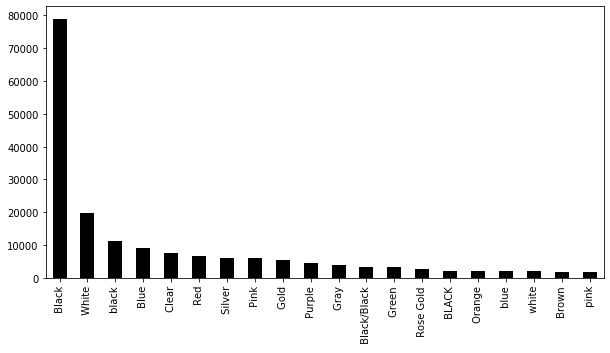

In [5]:
# Replace nan values with None in Prod_meta field
df_product_review.Prod_meta.fillna("None",inplace=True)

# Let's extract color values from Prod_meta
size=[]
color=[]
for j,i in enumerate(df_product_review.Prod_meta[:]):
    if i=='None':
        pass
    else:
        a=list(i.items())
        
        for k in range(0,len(a)):
            if a[k][0] =='Color:' or a[k][0] =='Color Name:':
                color.append(a[k][1])            
            elif a[k][0]=='Size:':                
                size.append(a[k][1])

        
# Let's plot color and see most of the products consists of which color
color=pd.DataFrame(color,columns=['Color'])
plt.subplots(figsize=(10,5))
color.Color.value_counts().head(20).plot(kind='bar',color='black')

* Most of the products consists of black color which bought by a customers

In [6]:
# Lets count color values
color.Color.value_counts().head(5)

 Black    78742
 White    19659
 black    11415
 Blue      9094
 Clear     7527
Name: Color, dtype: int64

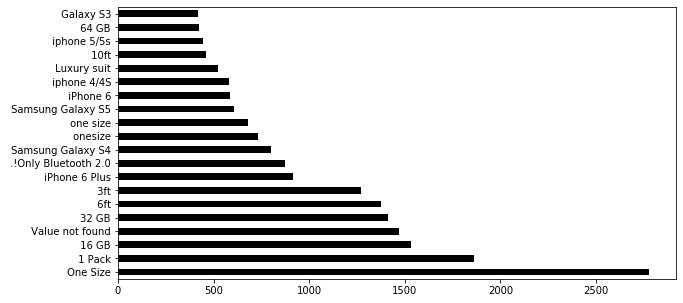

In [7]:
# Let's extract size values from Prod_meta

size=pd.DataFrame(size,columns=['Size'])
plt.subplots(figsize=(10,5))
size.Size.value_counts().head(20).plot(kind='barh',color='black')

* From above we can infered that :
>> 1. Products who has size 16 gb gets most reviews from customers it means they bought 16 gb variant products more.
>> 2. iPhone 6 recived highest no of reviews.
>> 3. Samsung Galaxy S5 recieved second highest reviews.
   

In [8]:
size.Size.value_counts().head(5)

 One Size           2779
 1 Pack             1862
 16 GB              1534
 Value not found    1469
 32 GB              1410
Name: Size, dtype: int64

In [9]:
#Removal of unnecessary columns
df_product_review.drop(['Prod_meta','Prod_img','Reviewer_Name'],axis=1,inplace=True)

In [10]:
#Let's drop null values from Review column
df_product_review = df_product_review[df_product_review['Review'].notnull()]
df_product_review

Rating  Rev_verify  Review_Date          IC  \
0            5        True   09 1, 2015  B009XD5TPQ   
1            5        True   01 9, 2016  B016MF3P3K   
2            5        True  04 21, 2013  B008DC8N5G   
3            3        True  02 27, 2013  B0089CH3TM   
4            4        True  12 19, 2013  B00AKZWGAC   
...        ...         ...          ...         ...   
760445       4       False  07 12, 2014  B00C3V9M8A   
760446       5       False  07 13, 2016  B0178BYS24   
760447       4        True  07 23, 2015  B009KY47CE   
760448       5        True  12 14, 2015  B00X60AYDY   
760449       5        True  02 24, 2016  B00QLD3YTO   

                                                   Review  \
0       Bought it for my husband. He's very happy with it   
1       Great screen protector.  Doesn't even seem as ...   
2       Saved me lots of money! it's not gorilla glass...   
3       The material and fit is very nice, but the col...   
4       This last me about 3 days till i have to charg...   
...                                                   ...   
760445                                          Very good   
760446  My name is Cynthia Beard and I believe that th...   
760447  This iphone case is very durable and long last...   
760448                                              great   
760449  So so, it did not look like the picture advert...   

                                                 Rev_summ  Review_timestamp  \
0                                    He's very happy with        1441065600   
1                                              Five Stars        1452297600   
2                   As long as you know how to put it on!        1366502400   
3                                       Good case overall        1361923200   
4                                         Awesome Battery        1387411200   
...                                                   ...               ...   
760445                                         Four Stars        1405123200   
760446  ... believe that the Samsung Galaxy car mount ...        1468368000   
760447                                        I LOVE THIS        1437609600   
760448                                         Five Stars        1450051200   
760449                                Front cam has hole.        1456272000   

       Useful  
0        None  
1        None  
2        None  
3           3  
4        None  
...       ...  
760445   None  
760446   None  
760447   None  
760448   None  
760449   None  

[759920 rows x 8 columns]

In [11]:
# Let's drop duplicates values from the dataset
df_product_review.drop_duplicates(inplace=True)
# Let's check sum of duplicated values and shape of the dataframe
print("sum of duplicated values{}\n".format(df_product_review.duplicated().sum()))
print("Shape of a dataset",df_product_review.shape)

sum of duplicated values0

Shape of a dataset (758147, 8)


## Let's explore Review_timestamp

In [12]:
from datetime import datetime
#Lets convert unix timestamp string to readable date
condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df_product_review["Review_timestamp"] = df_product_review["Review_timestamp"].apply(condition)
df_product_review["Review_timestamp"]

0         09-01-2015
1         01-09-2016
2         04-21-2013
3         02-27-2013
4         12-19-2013
             ...    
760445    07-12-2014
760446    07-13-2016
760447    07-23-2015
760448    12-14-2015
760449    02-24-2016
Name: Review_timestamp, Length: 758147, dtype: object

In [13]:
#The Review_Date is dropped since the unixReviewTime series more accurately describes the time when each review was posted.
df_product_review.drop(['Review_Date'],axis=1,inplace=True)

In [14]:
# Let's extract Day_of_Week,Day_Of_review,Month_of_Review,Year_of_Review from Review_timestamp to find out at what time i.e week ,day,month and year reviews published a most.
df_product_review["Day_of_Week"] = pd.to_datetime(df_product_review["Review_timestamp"], format = '%m-%d-%Y').dt.day_name()
df_product_review["Day_Of_review"] = pd.to_datetime(df_product_review["Review_timestamp"], format = '%m-%d-%Y').dt.day
df_product_review["Month_of_Review"] = pd.to_datetime(df_product_review["Review_timestamp"], format = '%m-%d-%Y').dt.month
df_product_review["Year_of_Review"] = pd.to_datetime(df_product_review["Review_timestamp"], format = '%m-%d-%Y').dt.year

print('Count of Year of the reviews given:')
print(df_product_review.Year_of_Review.value_counts())

print('Percentage Year of the reviews given: \n',(df_product_review.Year_of_Review.value_counts()/len(df_product_review.Rating))*100)

Count of Year of the reviews given:
2015    217367
2016    210050
2014    124619
2017     89428
2013     58157
2018     28216
2012     18854
2011      6041
2010      2231
2009      1480
2008       937
2007       439
2006       209
2005        82
2004        26
2003         9
2002         2
Name: Year_of_Review, dtype: int64
Percentage Year of the reviews given: 
 2015    28.670825
2016    27.705709
2014    16.437314
2017    11.795602
2013     7.670940
2018     3.721706
2012     2.486853
2011     0.796811
2010     0.294270
2009     0.195213
2008     0.123591
2007     0.057904
2006     0.027567
2005     0.010816
2004     0.003429
2003     0.001187
2002     0.000264
Name: Year_of_Review, dtype: float64


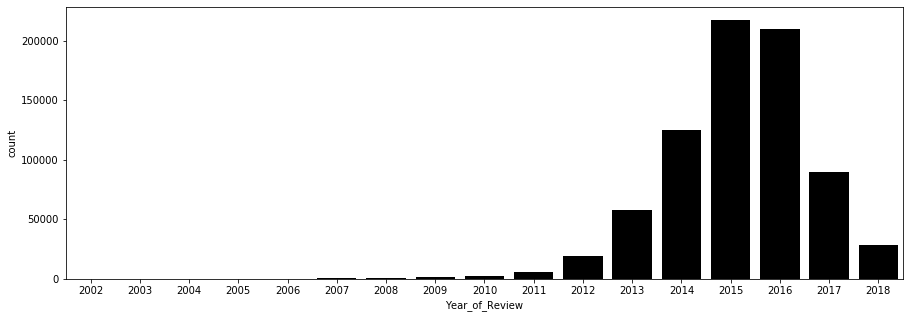

In [15]:
plt.subplots(figsize=(15,5))
sns.countplot(data=df_product_review,x='Year_of_Review',color="black")
plt.show()

* From above we can conclude that most of the reviews are published on 2015 year

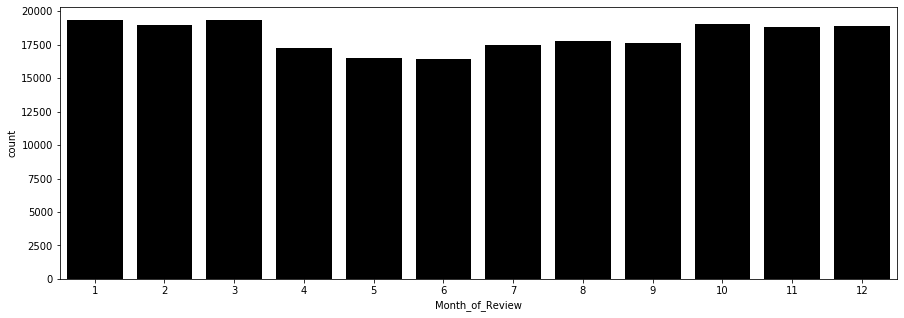

In [16]:
#Lets see most of the reviews published on which month in 2015 year
plt.subplots(figsize=(15,5))
sns.countplot(data=df_product_review[df_product_review['Year_of_Review']==2015],x='Month_of_Review',color="black")
plt.show()

* Most of the reviews published in jan,feb.march,oct,nov and dec in year 2015

count of the Verified and Unverified reviews
True     663507
False     94640
Name: Rev_verify, dtype: int64
Percentage of the Verified and Unverified reviews:
 True     87.516933
False    12.483067
Name: Rev_verify, dtype: float64


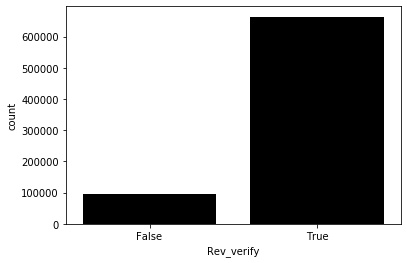

In [17]:
#Lets see verify and unverify reviews from Rev_verify
print('count of the Verified and Unverified reviews')
print(df_product_review.Rev_verify.value_counts())

print('Percentage of the Verified and Unverified reviews:\n',(df_product_review.Rev_verify.value_counts()/len(df_product_review.Rev_verify))*100)

sns.countplot(data=df_product_review,x='Rev_verify',color="black")
plt.show()

* From above we can say most the reviews are legit i.e approx 87%.

Count of the ratings:
5    475201
4    123562
3     66201
1     54804
2     38379
Name: Rating, dtype: int64
Percentage of the  ratings: 
 5    62.679269
4    16.297895
3     8.731948
1     7.228677
2     5.062211
Name: Rating, dtype: float64


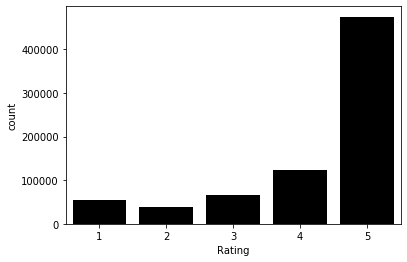

In [18]:
#Let's find out count and percentage of a ratings
print('Count of the ratings:')
print(df_product_review.Rating.value_counts())

print('Percentage of the  ratings: \n',(df_product_review.Rating.value_counts()/len(df_product_review.Rating))*100)

sns.countplot(data=df_product_review,x='Rating',color="black")
plt.show()

## Explore Rating

In [19]:
# Exploring Ratings:
average_rating = round(df_product_review.groupby(['IC'])['Rating'].mean().reset_index(),1)
minimum_rating = df_product_review.groupby(['IC'])['Rating'].min().reset_index()
maximum_rating = df_product_review.groupby(['IC'])['Rating'].max().reset_index()
total_ratings = df_product_review.groupby(['IC'])['Rating'].count().reset_index()

In [20]:
# Finding out the number of counts of rating given to a particular product
one_star= df_product_review[df_product_review['Rating']==1].groupby(['IC'])['Rating'].count().reset_index()
two_star = df_product_review[df_product_review['Rating']==2].groupby(['IC'])['Rating'].count().reset_index()
three_star = df_product_review[df_product_review['Rating']==3].groupby(['IC'])['Rating'].count().reset_index()
four_star= df_product_review[df_product_review['Rating']==4].groupby(['IC'])['Rating'].count().reset_index()
five_star= df_product_review[df_product_review['Rating']==5].groupby(['IC'])['Rating'].count().reset_index()

In [21]:
# Creating a DataFrame in order to show all the Ratings Information in a single place
df_Ratings=pd.DataFrame(data={'Product_ID':average_rating.IC,'Average_rating':average_rating.Rating,'Minimum_ratings':minimum_rating.Rating,'Maximum_rating':maximum_rating.Rating,'ONE_Star_Rating':one_star.Rating,'TWO_Star_Rating':two_star.Rating,'THREE_Star_Rating':three_star.Rating,'FOUR_Star_Rating':four_star.Rating,'FIVE_Star_Rating':five_star.Rating,'Total_ratings':total_ratings.Rating})
# Filling NaN values with 0 values as it doest effect on any column
df_Ratings.fillna(0,inplace=True)

In [22]:
# Converting float values of ratings calculated above into int
for col in df_Ratings.select_dtypes(include=['float']).columns:
             df_Ratings[col] = df_Ratings[col].astype(int)
df_Ratings.sample(10)

Product_ID  Average_rating  Minimum_ratings  Maximum_rating  \
28398  B00QVDFWTO               4                1               5   
17262  B00HNKOOK2               3                1               5   
32036  B00W30BKFO               4                2               5   
40972  B018YJRGGO               3                1               5   
35104  B010OSQIBM               4                1               5   
26935  B00PB24K1W               4                2               5   
22958  B00MGFNSLK               5                5               5   
45521  B01EBQJ0VS               4                3               5   
47089  B01G6A3DEM               4                2               5   
33918  B00YVMECQG               5                5               5   

       ONE_Star_Rating  TWO_Star_Rating  THREE_Star_Rating  FOUR_Star_Rating  \
28398                0                0                  0                 1   
17262                1                1                  2                 1   
32036                0                0                  0                 3   
40972                0                0                  0                 0   
35104                0                0                  0                 0   
26935                0                0                  0                 3   
22958                0                0                  4                 2   
45521                0                0                  0                 0   
47089                0                0                  0                 0   
33918                0                0                  0                 1   

       FIVE_Star_Rating  Total_ratings  
28398                 3             33  
17262                20              5  
32036                15             15  
40972                 8             16  
35104                 6              9  
26935                 3              9  
22958                 1              1  
45521                 1             12  
47089                 0             20  
33918                 6              3

In [23]:
#Let's describe object column
df_product_review.describe(include='object')


IC  Review    Rev_summ Review_timestamp Useful Day_of_Week
count       758147  758147      757829           758147  61949      758147
unique       48133  637152      366596             4362    386           7
top     B00VH88CJ0    good  Five Stars       02-18-2015      2      Monday
freq          1125    4413      153748              919  22450      121825

In [24]:
# Let's find out the unique values
print("\nNumber of unique value in the columns are: ")
for col in df_product_review.columns.values:
    print("number of unique value of {} : {}".format(col, df_product_review[col].nunique()))


Number of unique value in the columns are: 
number of unique value of Rating : 5
number of unique value of Rev_verify : 2
number of unique value of IC : 48133
number of unique value of Review : 637152
number of unique value of Rev_summ : 366596
number of unique value of Review_timestamp : 4362
number of unique value of Useful : 386
number of unique value of Day_of_Week : 7
number of unique value of Day_Of_review : 31
number of unique value of Month_of_Review : 12
number of unique value of Year_of_Review : 17


Text(0.5, 1.0, 'Number of Reviews for Top 20 Products')

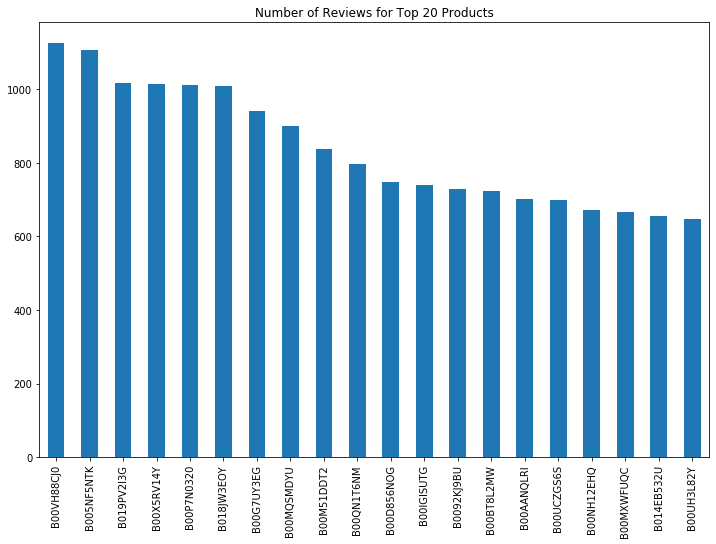

In [25]:
# Plot number of reviews for top 20 Products("IC")
brands = df_product_review["IC"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Products")

* B00VH88CJ0 productid("IC") get highest no of reviews

## Data Preprocessing 

In [26]:
# Let's fill out NaN values with ' ' in Rev_summ
df_product_review["Rev_summ"].fillna(" ", inplace = True) 

In [27]:
#Let's combine Review and Rev_summ and insert its value into Full_review column
df_product_review['Full_review']=df_product_review.Review+' '+df_product_review.Rev_summ
df_product_review['Full_review'].head()

0    Bought it for my husband. He's very happy with...
1    Great screen protector.  Doesn't even seem as ...
2    Saved me lots of money! it's not gorilla glass...
3    The material and fit is very nice, but the col...
4    This last me about 3 days till i have to charg...
Name: Full_review, dtype: object

In [28]:
# Let's combine all the reviews of a customer into paticular  product id i,e IC
df_product_review_new = df_product_review.groupby(['IC'])['Full_review'].apply('. '.join).reset_index()
df_product_review_new['Full_review'].head()

0    It is such a good case for a low price. I have...
1    I was very excited when I first got this case....
2    Good item Five Stars. Received this in about a...
3    thank you. Five Stars. Works some of the time....
4    Great ! So far.\nI had this charger before and...
Name: Full_review, dtype: object

In [29]:
# Let's check unique products_id
products_id = df_product_review_new["IC"].unique().tolist()
len(products_id)

48133

In [30]:
''' Lets count the values of "IC" to ensure that all the reviews of a particular id sucessfully combine into single review of that 
 particular productid'''
df_product_review_new["IC"].value_counts()


B00QA16A6G    1
B006K6PLOS    1
B00B5R78ZW    1
B00N4DSGVU    1
B01GNWPCJ2    1
             ..
B003U63SD2    1
B00ENBD7X4    1
B00VFZJ1TK    1
B00N29ECCS    1
B00AEDFNK0    1
Name: IC, Length: 48133, dtype: int64

In [31]:
#Let's calculate the length of new_Full_review_length field
df_product_review_new["new_Full_review_length"] = df_product_review_new.Full_review.str.len()
df_product_review_new

IC                                        Full_review  \
0      7508492919  It is such a good case for a low price. I have...   
1      7532385086  I was very excited when I first got this case....   
2      7887421268  Good item Five Stars. Received this in about a...   
3      8199900164  thank you. Five Stars. Works some of the time....   
4      8288853439  Great ! So far.\nI had this charger before and...   
...           ...                                                ...   
48128  B01HJBS5C2  Strong, protective but slim and light. I am al...   
48129  B01HJC7N4C  my sons likes it. For the price it isn't too b...   
48130  B01HJCN1UC  great thanks Five Stars. good cable. just be s...   
48131  B01HJCN55I  Received the cable in two days and it's the be...   
48132  B01HJH9IN6  Just received it and it's VERY thin. No need t...   

       new_Full_review_length  
0                        7693  
1                        1151  
2                        2035  
3                         309  
4                        2410  
...                       ...  
48128                    3323  
48129                    5018  
48130                    3874  
48131                    1632  
48132                    1057  

[48133 rows x 3 columns]

In [32]:
''' Let's calculate the length of previous dataframe(df_product_review["Review"]) and compare it with new dataframe(df_product_review_new[ 
 new_Full_review_length]) so that we can sure that we sucessfully merge reviews for a particular id.
'''
df_product_review_new["Prev_full_review_length"] = df_product_review.Review.str.len()
df_product_review_new

IC                                        Full_review  \
0      7508492919  It is such a good case for a low price. I have...   
1      7532385086  I was very excited when I first got this case....   
2      7887421268  Good item Five Stars. Received this in about a...   
3      8199900164  thank you. Five Stars. Works some of the time....   
4      8288853439  Great ! So far.\nI had this charger before and...   
...           ...                                                ...   
48128  B01HJBS5C2  Strong, protective but slim and light. I am al...   
48129  B01HJC7N4C  my sons likes it. For the price it isn't too b...   
48130  B01HJCN1UC  great thanks Five Stars. good cable. just be s...   
48131  B01HJCN55I  Received the cable in two days and it's the be...   
48132  B01HJH9IN6  Just received it and it's VERY thin. No need t...   

       new_Full_review_length  Prev_full_review_length  
0                        7693                     49.0  
1                        1151                     66.0  
2                        2035                    285.0  
3                         309                    109.0  
4                        2410                    468.0  
...                       ...                      ...  
48128                    3323                    176.0  
48129                    5018                      9.0  
48130                    3874                    122.0  
48131                    1632                    157.0  
48132                    1057                    112.0  

[48133 rows x 4 columns]

In [33]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a adjective etc. using the WordNet lexical database
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # Remove (/n) from text
    text=re.sub("\n", " ", text)
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only three letter
    text = [t for t in text if len(t) > 3]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_product_review_new["Full_review_clean"] = df_product_review_new["Full_review"].apply(lambda x: clean_text(x))

### To clean textual data, call  custom 'clean_text' function that performs several transformations:

* lower the text
* remove next line(/n)
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this','is' etc.
* remove empty tokens
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a adjective  using the   WordNet   lexical database
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)
* remove words with only three letter

In [34]:
# Add number of words column after cleaning the text
df_product_review_new["Full_review_clean_length"] = df_product_review_new["Full_review_clean"] .apply(lambda x: len(x.split(" ")))

df_product_review_new.head()

IC                                        Full_review  \
0  7508492919  It is such a good case for a low price. I have...   
1  7532385086  I was very excited when I first got this case....   
2  7887421268  Good item Five Stars. Received this in about a...   
3  8199900164  thank you. Five Stars. Works some of the time....   
4  8288853439  Great ! So far.\nI had this charger before and...   

   new_Full_review_length  Prev_full_review_length  \
0                    7693                     49.0   
1                    1151                     66.0   
2                    2035                    285.0   
3                     309                    109.0   
4                    2410                    468.0   

                                   Full_review_clean  Full_review_clean_length  
0  good case price right never problem besides lo...                       633  
1  excited first case loved color feel started no...                        96  
2  good item five star received week time nice ac...                       176  
3  thank five star works time charger stopped wor...                        25  
4  great charger seem last pretty good year phone...                       186

In [35]:
df_product_review_new["Full_review_clean"].head()

0    good case price right never problem besides lo...
1    excited first case loved color feel started no...
2    good item five star received week time nice ac...
3    thank five star works time charger stopped wor...
4    great charger seem last pretty good year phone...
Name: Full_review_clean, dtype: object

In [36]:
import spacy
nlp=spacy.load("en_core_web_lg") 

"""Define a function to extract keywords"""

def get_aspects(x):
    doc=nlp(x) ## Tokenize and extract grammatical components
    doc=[i.text for i in doc if i.pos_=="NOUN"] ## retain only nouns
    doc=pd.Series(doc)
    doc=doc.value_counts().head(15).index.tolist() ## Get 15 most frequent nouns
    return doc

df_product_review_new["Full_review_clean_keyword"] = df_product_review_new["Full_review_clean"].apply(lambda x: get_aspects(x))


### To extract keyword, call  custom 'get_aspects' function that performs several transformations:

* Tokenize and extract grammatical components.
* Extract all the most frequent nouns.
* Find out top 15, most frequent nouns, these will be the key-words/aspects.

In [39]:
df_product_review_new["Full_review_clean_keyword"].head(10)

0    [case, phone, love, time, bling, stone, pictur...
1    [phone, case, product, cover, money, refund, s...
2    [case, phone, product, star, deal, protection,...
3    [phone, work, star, item, charger, mind, beep,...
4    [charger, work, phone, price, star, galaxy, co...
5    [charger, phone, work, star, price, cord, prod...
6    [charger, cord, phone, company, base, work, ye...
7    [charger, phone, work, star, product, charge, ...
8    [case, phone, price, star, access, design, wif...
9    [charger, charge, phone, work, star, junk, mon...
Name: Full_review_clean_keyword, dtype: object

In [41]:
df_product_review_new["Full_review_clean_keyword"] [1]

['phone',
 'case',
 'product',
 'cover',
 'money',
 'refund',
 'stuff',
 'durable',
 'issue',
 'send',
 'thanks',
 'waste',
 'compliment',
 'order',
 'star']

In [42]:
'''Let  make a column which contains all the reviews positive and negative based on their average ratings. Negative(<3) and Positive(>=3).
'''
Sentiment_review_list=[]
for i in df_Ratings["Average_rating"]:
    if i>=3:
        Sentiment_review_list.append('Positive')
    elif i<3:
        Sentiment_review_list.append("Negative")
        
df_Ratings["Sentiment_review"] = Sentiment_review_list

In [44]:
df_Ratings.head(15)

Product_ID  Average_rating  Minimum_ratings  Maximum_rating  \
0   7508492919               4                1               5   
1   7532385086               3                1               5   
2   7887421268               3                1               5   
3   8199900164               3                2               5   
4   8288853439               3                1               5   
5   8288862993               3                1               5   
6   828886922X               4                3               5   
7   8288878881               4                1               5   
8   9578085451               4                3               5   
9   961301375X               3                1               5   
10  9638762632               2                1               5   
11  9652676748               3                2               5   
12  9658231969               3                1               5   
13  9678315173               4                4               5   
14  9707716371               4                1               5   

    ONE_Star_Rating  TWO_Star_Rating  THREE_Star_Rating  FOUR_Star_Rating  \
0                 1                1                  4                13   
1                 2                1                  1                 2   
2                 3                1                  1                 2   
3                 2                1                  1                 2   
4                 6                3                  2                 6   
5                 6                2                  1                 2   
6                 3                1                  5                 5   
7                 4                2                  1                 1   
8                 2                5                  1                 2   
9                 5                1                  1                 3   
10                1                1                  4                 1   
11                2                2                  2                 2   
12                1                1                  1                14   
13                1                1                  1                 2   
14                2                2                  1                 2   

    FIVE_Star_Rating  Total_ratings Sentiment_review  
0                 21             40         Positive  
1                  2              7         Positive  
2                  6             13         Positive  
3                  2              4         Positive  
4                  6             11         Positive  
5                 15             32         Positive  
6                  3              6         Positive  
7                 26             44         Positive  
8                  2              4         Positive  
9                  8             13         Positive  
10                 2             11         Negative  
11                 2              5         Positive  
12                 3              6         Positive  
13                 5              7         Positive  
14                36             64         Positive

In [46]:
#Lets rename the Product_ID with IC which helps later to merge the df_Ratings  with df_product_review_imp
df_Ratings=df_Ratings.rename(columns = {'Product_ID':'IC'})
df_Ratings.head()


IC  Average_rating  Minimum_ratings  Maximum_rating  \
0  7508492919               4                1               5   
1  7532385086               3                1               5   
2  7887421268               3                1               5   
3  8199900164               3                2               5   
4  8288853439               3                1               5   

   ONE_Star_Rating  TWO_Star_Rating  THREE_Star_Rating  FOUR_Star_Rating  \
0                1                1                  4                13   
1                2                1                  1                 2   
2                3                1                  1                 2   
3                2                1                  1                 2   
4                6                3                  2                 6   

   FIVE_Star_Rating  Total_ratings Sentiment_review  
0                21             40         Positive  
1                 2              7         Positive  
2                 6             13         Positive  
3                 2              4         Positive  
4                 6             11         Positive

In [45]:
#Let's create the dataframe(df_product_review_imp) which contains only relevant columns i.e IC,Full_review_clean_keyword from df_product_review_new dataframe
df_product_review_imp=pd.DataFrame(data={'IC':df_product_review_new.IC,'Keyword_Summary':df_product_review_new.Full_review_clean_keyword})
df_product_review_imp.head()

IC                                    Keyword_Summary
0  7508492919  [case, phone, love, time, bling, stone, pictur...
1  7532385086  [phone, case, product, cover, money, refund, s...
2  7887421268  [case, phone, product, star, deal, protection,...
3  8199900164  [phone, work, star, item, charger, mind, beep,...
4  8288853439  [charger, work, phone, price, star, galaxy, co...

In [47]:
#Let's merge the df_Ratings and df_product_review_imp to get the final dataframe
df_Product_Reviews_Summarization_final=pd.merge(df_Ratings, df_product_review_imp, how ='inner', on ='IC')
df_Product_Reviews_Summarization_final

IC  Average_rating  Minimum_ratings  Maximum_rating  \
0      7508492919               4                1               5   
1      7532385086               3                1               5   
2      7887421268               3                1               5   
3      8199900164               3                2               5   
4      8288853439               3                1               5   
...           ...             ...              ...             ...   
48128  B01HJBS5C2               3                1               5   
48129  B01HJC7N4C               4                3               5   
48130  B01HJCN1UC               4                4               5   
48131  B01HJCN55I               4                2               5   
48132  B01HJH9IN6               2                1               5   

       ONE_Star_Rating  TWO_Star_Rating  THREE_Star_Rating  FOUR_Star_Rating  \
0                    1                1                  4                13   
1                    2                1                  1                 2   
2                    3                1                  1                 2   
3                    2                1                  1                 2   
4                    6                3                  2                 6   
...                ...              ...                ...               ...   
48128                0                0                  0                 0   
48129                0                0                  0                 0   
48130                0                0                  0                 0   
48131                0                0                  0                 0   
48132                0                0                  0                 0   

       FIVE_Star_Rating  Total_ratings Sentiment_review  \
0                    21             40         Positive   
1                     2              7         Positive   
2                     6             13         Positive   
3                     2              4         Positive   
4                     6             11         Positive   
...                 ...            ...              ...   
48128                 0             12         Positive   
48129                 0              5         Positive   
48130                 0             22         Positive   
48131                 0             11         Positive   
48132                 0              6         Negative   

                                         Keyword_Summary  
0      [case, phone, love, time, bling, stone, pictur...  
1      [phone, case, product, cover, money, refund, s...  
2      [case, phone, product, star, deal, protection,...  
3      [phone, work, star, item, charger, mind, beep,...  
4      [charger, work, phone, price, star, galaxy, co...  
...                                                  ...  
48128  [case, phone, clip, belt, holster, star, prote...  
48129  [headset, device, apps, phone, glass, review, ...  
48130  [cord, cable, star, length, charger, love, wor...  
48131  [cable, time, work, issue, length, fire, star,...  
48132  [case, phone, star, protection, price, making,...  

[48133 rows x 12 columns]

In [49]:
# converting and saving final dataframe to .json file

df_Product_Reviews_Summarization_final.to_json(r'C:\Users\devanshu suri\Downloads\Cell_Phones_and_Accessories_keywords.json')


count of the Postive and Negative reviews
Positive    46186
Negative     1947
Name: Sentiment_review, dtype: int64
Percentage of the Positive and Negative reviews:
 Positive    95.954958
Negative     4.045042
Name: Sentiment_review, dtype: float64


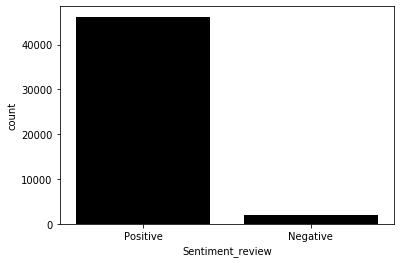

In [50]:
#Lets see Positive  and Negative reviews from Sentiment_review
print('count of the Postive and Negative reviews')
print(df_Product_Reviews_Summarization_final.Sentiment_review.value_counts())

print('Percentage of the Positive and Negative reviews:\n',(df_Product_Reviews_Summarization_final.Sentiment_review.value_counts()/len(df_Product_Reviews_Summarization_final.Sentiment_review))*100)

sns.countplot(data=df_Product_Reviews_Summarization_final,x='Sentiment_review',color="black")
plt.show()

* From above we can say that most of the customers are happy with all the products.